In [4]:
import pandas as pd 
import numpy as np 

import matplotlib
import matplotlib.pyplot as plt 


from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
 
# 분류모델 평가 함수 
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.metrics import confusion_matrix, classification_report 

In [5]:
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

matplotlib.rc('axes',unicode_minus=False)

In [6]:
df_raw = pd.read_csv("D:/data/2/HMEQ.csv", encoding = 'EUC-KR')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


In [7]:
df_raw.isnull().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [8]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(),inplace=True)
df_raw.isnull().sum()

C:\Users\NOH TAEYUN\AppData\Local\Temp\ipykernel_5416\26507450.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace=True)


BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [9]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


In [10]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw_dummy["BAD"] #목표변수 설정
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)

(2623, 18)
(2623,)


In [11]:
tree_uncustomized = DecisionTreeClassifier(random_state =1234)
tree_uncustomized.fit(df_train_x, df_train_y)
print("Socor on training set: {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on Validation set: {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))
tree_uncustomized #과적합 되어 있다.

Socor on training set: 1.000
Score on Validation set: 0.932


DecisionTreeClassifier(random_state=1234)

In [12]:
train_accuracy = []; test_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeClassifier(max_depth = v_max_depth, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy

In [13]:
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.926,0.924
1,2,0.931,0.927
2,3,0.934,0.921
3,4,0.937,0.928
4,5,0.940,0.930
5,6,0.941,0.930
6,7,0.947,0.935
7,8,0.951,0.933
8,9,0.957,0.933
9,10,0.960,0.938


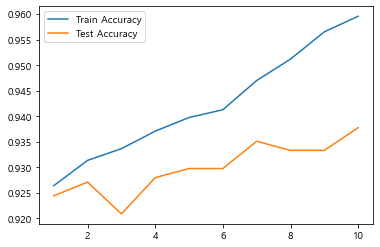

In [14]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.legend()

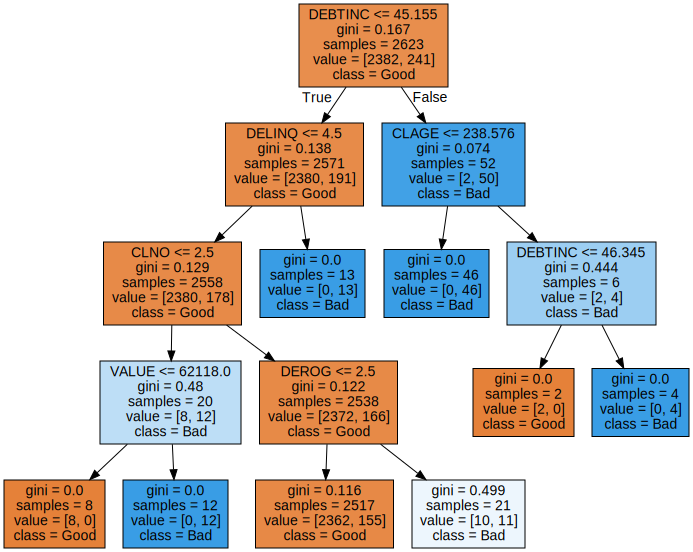

In [15]:
v_feature_name = df_train_x.columns

tree_low = DecisionTreeClassifier(max_depth = 4, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

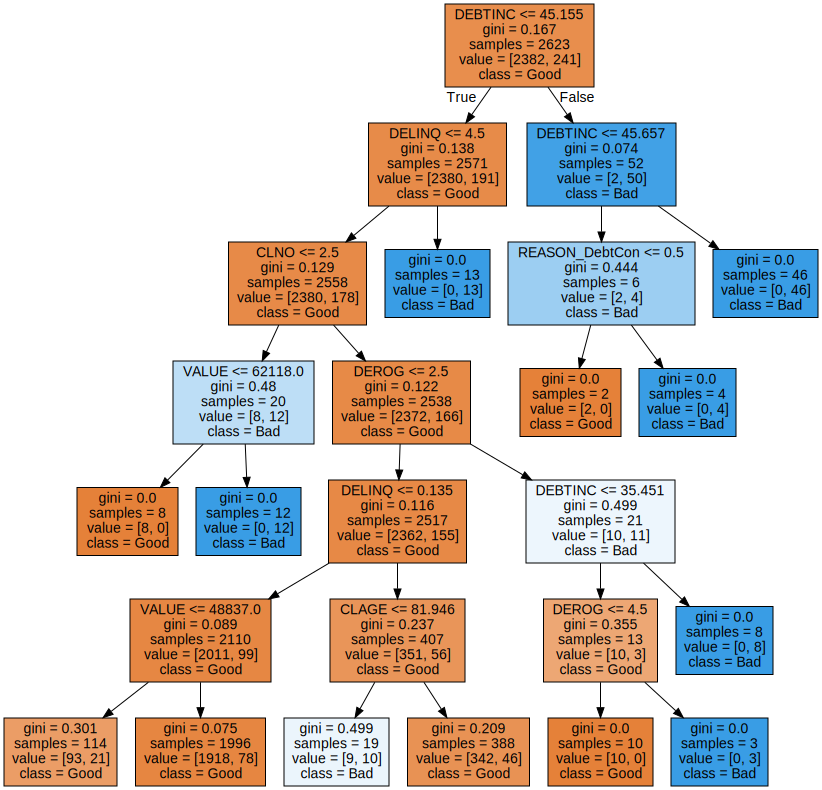

In [16]:
tree_high = DecisionTreeClassifier(max_depth = 6, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [17]:
train_accuracy = []; test_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree = DecisionTreeClassifier(min_samples_split=v_min_samples_split, max_depth =4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.936,0.928
1,20,0.936,0.928
2,30,0.933,0.921
3,40,0.933,0.921
4,50,0.933,0.921
5,60,0.933,0.921
6,70,0.933,0.921
7,80,0.933,0.921
8,90,0.933,0.921
9,100,0.933,0.921


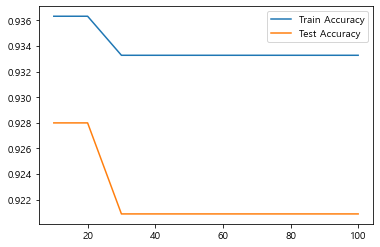

In [18]:
plt.plot(para_split, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle="-", label = "Test Accuracy")
plt.legend()

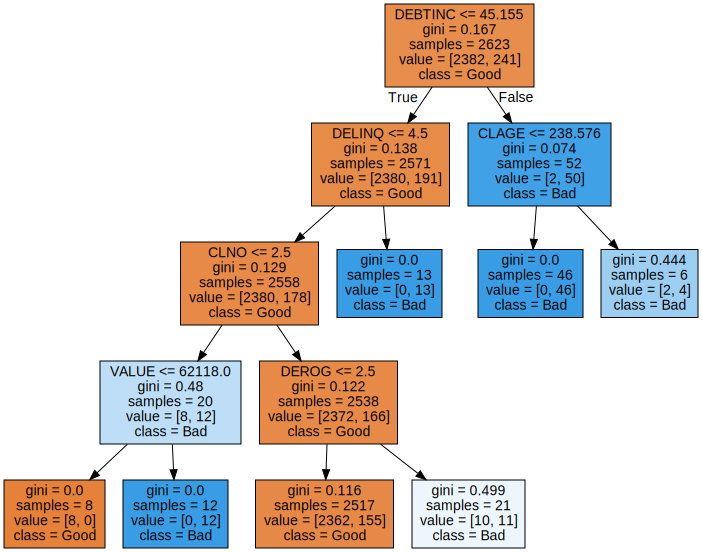

In [19]:
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split=20, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

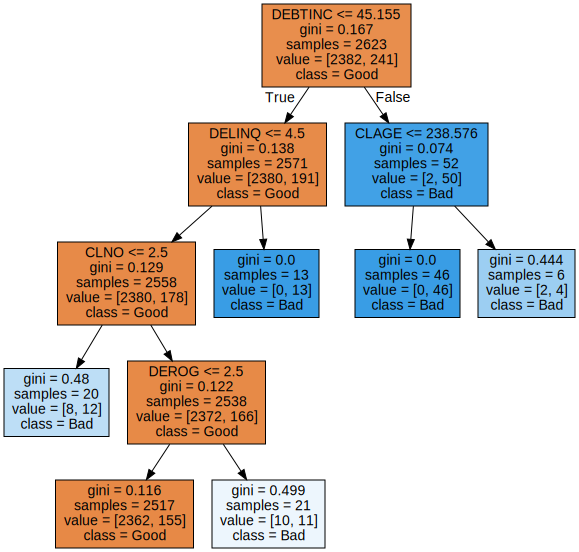

In [20]:
tree_high = DecisionTreeClassifier(max_depth = 4, min_samples_split=30, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [21]:
train_accuracy = []; test_accuracy =[]
para_leaf = [n_leaf*2 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeClassifier(min_samples_leaf = v_min_samples_leaf, min_samples_split=20, max_depth =4, random_state = 1234)
    tree.fit(df_train_x, df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,2,0.936,0.928
1,4,0.936,0.928
2,6,0.936,0.928
3,8,0.936,0.928
4,10,0.936,0.928
5,12,0.933,0.921
6,14,0.932,0.917
7,16,0.932,0.919
8,18,0.932,0.919
9,20,0.932,0.919


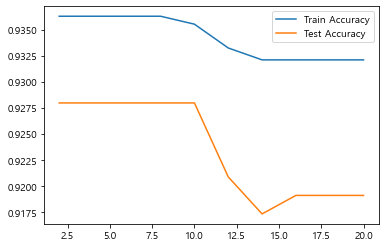

In [22]:
plt.plot(para_leaf, train_accuracy, linestyle="-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle="-", label = "Test Accuracy")
plt.legend()

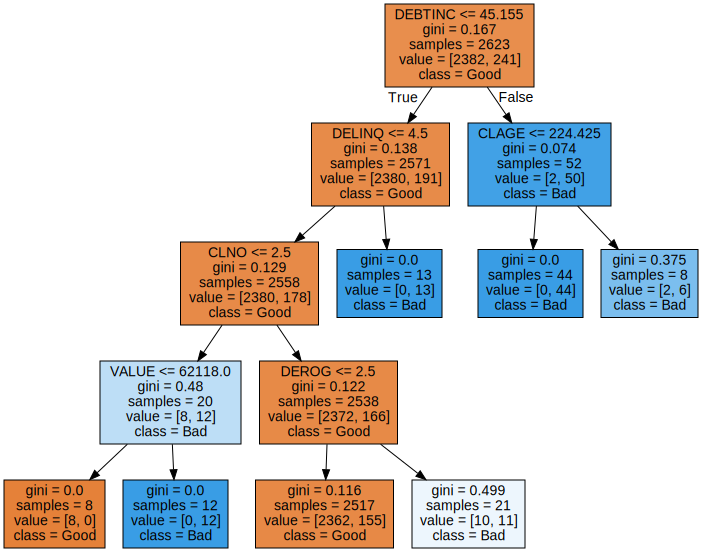

In [23]:
tree_low = DecisionTreeClassifier(max_depth = 4, min_samples_split=20, min_samples_leaf = 8, random_state = 1234)
tree_low.fit(df_train_x, df_train_y)
export_graphviz(tree_low, out_file = "tree_low.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_low.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

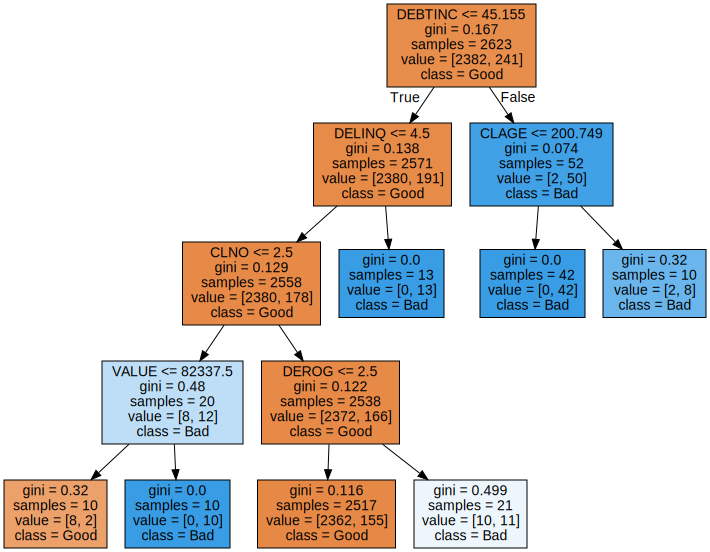

In [24]:
tree_high = DecisionTreeClassifier(max_depth = 4, min_samples_split=20, min_samples_leaf=10, random_state = 1234)
tree_high.fit(df_train_x, df_train_y)
export_graphviz(tree_high, out_file = "tree_high.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity=True, filled = True)

with open ("tree_high.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

In [25]:
tree_final = DecisionTreeClassifier(max_depth = 4, min_samples_split=20, min_samples_leaf = 8, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                       random_state=1234)

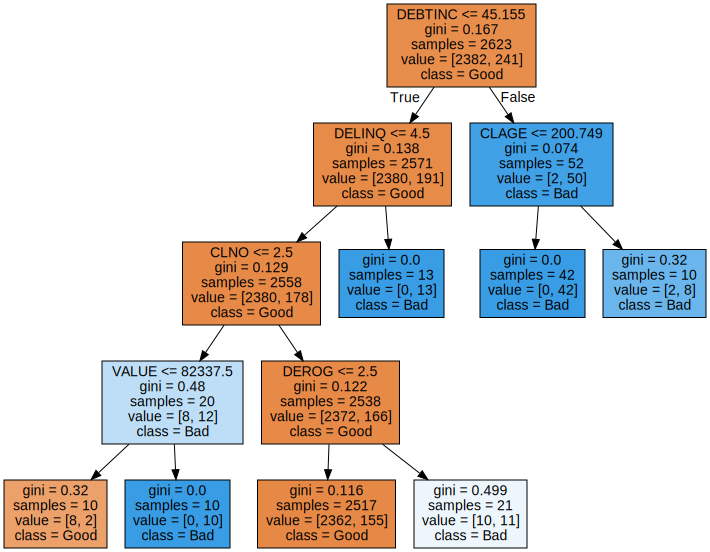

In [26]:
export_graphviz(tree_final, out_file="tree_final.dot", class_names = ["Good", "Bad"],
               feature_names = v_feature_name, impurity = True, filled = True)

with open("tree_final.dot") as f:
    dor_graph = f.read()
display(graphviz.Source(dot_graph))

In [27]:
y_pred = tree_final.predict(df_test_x)
print("Accuracy: {0:.4f}\n".format(tree_final.score(df_test_x, df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy: 0.9280

Confusion Matrix:
[[1015    6]
 [  75   29]]


In [28]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.602
5,DELINQ,0.168
8,CLNO,0.085
2,VALUE,0.072
4,DEROG,0.067
6,CLAGE,0.006
12,JOB_Mgr,0.000
16,JOB_Sales,0.000
15,JOB_ProfExe,0.000
14,JOB_Other,0.000


Text(0, 0.5, '설명변수')

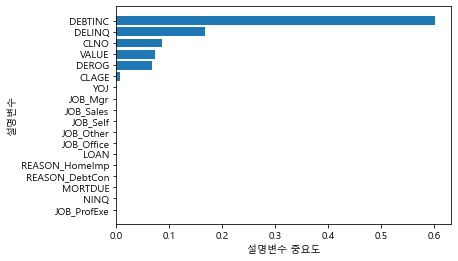

In [29]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")

### 랜덤 포레스트

In [30]:
df_raw.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

In [31]:
df_raw["JOB"].fillna("Other", inplace = True)
df_raw.fillna(df_raw.mean(),inplace=True)

C:\Users\NOH TAEYUN\AppData\Local\Temp\ipykernel_5416\3501330415.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_raw.fillna(df_raw.mean(),inplace=True)


In [32]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3743,0,88900,57264,90185.0,16.0,0,0.0,221.808718,0.0,16,36.112347,1,0,0,0,1,0,0,0
3744,0,89000,54576,92937.0,16.0,0,0.0,208.692070,0.0,15,35.859971,1,0,0,0,1,0,0,0
3745,0,89200,54045,92924.0,15.0,0,0.0,212.279697,0.0,15,35.556590,1,0,0,0,1,0,0,0
3746,0,89800,50370,91861.0,14.0,0,0.0,213.892709,0.0,16,34.340882,1,0,0,0,1,0,0,0


In [33]:
df_raw_x=df_raw_dummy.drop("BAD", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw_dummy["BAD"] #목표변수 설정
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)

(2623, 18)
(2623,)


In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf_uncustomized = RandomForestClassifier(random_state =1234)
rf_uncustomized.fit(df_train_x, df_train_y)
print("Accuracy on training set: {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))
rf_uncustomized #과적합 되어 있다.

Accuracy on training set: 1.000
Accuracy on test set: 0.946


RandomForestClassifier(random_state=1234)

In [36]:
train_accuracy = []; test_accuracy =[]
para_n_tree = [n_tree*10 for n_tree in range(1,21)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(n_estimators = v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n["n_estimators"] = para_n_tree
df_accuracy_n["TrainAccuracy"] = train_accuracy
df_accuracy_n["TestAccuracy"] = test_accuracy

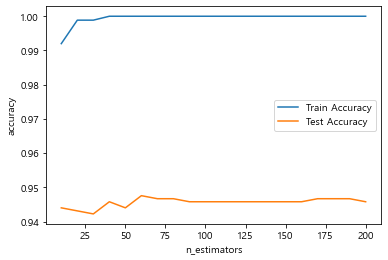

In [37]:

plt.plot(para_n_tree, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_tree, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.xlabel("n_estimators"); plt.ylabel("accuracy")
plt.legend()

In [38]:
oob_error = []
for v_n_estimator in range(1,151):
    rf = RandomForestClassifier(n_estimators=v_n_estimator, oob_score = True, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    oob_error.append(1-rf.oob_score_)

c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
c:\dev\Python310\lib\site-packages\sklearn\ensemble\_forest.py:586: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to comp

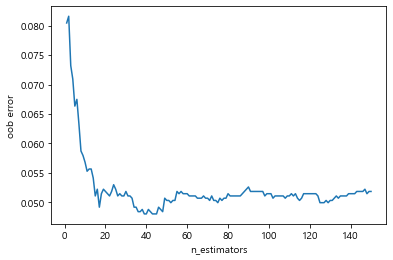

In [39]:
plt.plot(range(1, 151), oob_error)
plt.ylabel("oob error")
plt.xlabel("n_estimators")
n_estimators=100

In [40]:
train_accuracy = []; test_accuracy =[]
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(max_depth = v_max_depth, n_estimators= 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth["Depth"] = para_depth
df_accuracy_depth["TrainAccuracy"] = train_accuracy
df_accuracy_depth["TestAccuracy"] = test_accuracy
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy
0,1,0.908,0.908
1,2,0.912,0.910
2,3,0.932,0.928
3,4,0.933,0.930
4,5,0.938,0.931
5,6,0.941,0.932
6,7,0.945,0.934
7,8,0.949,0.936
8,9,0.951,0.935
9,10,0.956,0.938


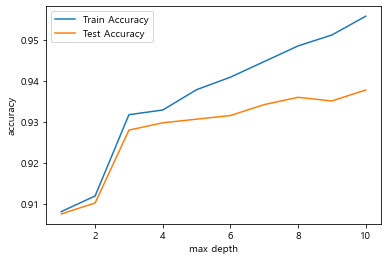

In [41]:
plt.plot(para_depth, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_depth, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.xlabel("max depth"); plt.ylabel("accuracy")
plt.legend()

max_depth = 4

In [42]:
train_accuracy = []; test_accuracy =[]
para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(min_samples_split=v_min_samples_split, max_depth =4, n_estimators =100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_split = pd.DataFrame()
df_accuracy_split ["MinSamplesSplit"] = para_split
df_accuracy_split ["TrainAccuracy"] = train_accuracy
df_accuracy_split ["TestAccuracy"] = test_accuracy
df_accuracy_split.round(3)

,MinSamplesSplit,TrainAccuracy,TestAccuracy
0,10,0.933,0.929
1,20,0.933,0.929
2,30,0.932,0.929
3,40,0.933,0.929
4,50,0.932,0.929
5,60,0.932,0.929
6,70,0.932,0.929
7,80,0.932,0.928
8,90,0.932,0.928
9,100,0.932,0.928


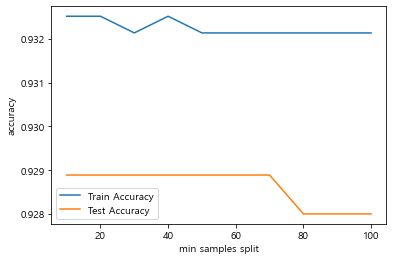

In [43]:
plt.plot(para_split, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_split, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [44]:

train_accuracy = []; test_accuracy =[]
para_leaf = [n_leaf* 10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(min_samples_leaf = v_min_samples_leaf, max_depth =4, n_estimators = 100, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x, df_test_y))
    
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf ["MinSamplesLeaf"] = para_leaf
df_accuracy_leaf ["TrainAccuracy"] = train_accuracy
df_accuracy_leaf ["TestAccuracy"] = test_accuracy
df_accuracy_leaf.round(3)

,MinSamplesLeaf,TrainAccuracy,TestAccuracy
0,10,0.930,0.928
1,20,0.927,0.925
2,30,0.927,0.924
3,40,0.920,0.916
4,50,0.908,0.908
5,60,0.908,0.908
6,70,0.908,0.908
7,80,0.908,0.908
8,90,0.908,0.908
9,100,0.908,0.908


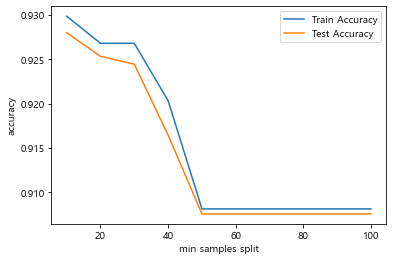

In [45]:
plt.plot(para_leaf, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_leaf, test_accuracy, linestyle = "-", label = "Test Accuracy")
plt.xlabel("min samples split"); plt.ylabel("accuracy")
plt.legend()

In [46]:
rf_final = RandomForestClassifier(min_samples_leaf = 20, max_depth = 4, n_estimators= 100, random_state=1234)
rf_final.fit(df_train_x, df_train_y)

y_pred = rf_final.predict(df_test_x)
print("Accuracy on training set: {:.3f}\n".format(rf_final.score(df_train_x, df_train_y)))
print("Accuracy on test set: {:.3f}\n".format(rf_final.score(df_test_x, df_test_y)))
print("Confusion Matrix:\n{}".format(confusion_matrix(df_test_y, y_pred)))

Accuracy on training set: 0.927

Accuracy on test set: 0.925

Confusion Matrix:
[[1021    0]
 [  84   20]]


In [47]:
v_feature_name = df_train_x.columns
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
9,DEBTINC,0.475
5,DELINQ,0.175
4,DEROG,0.066
6,CLAGE,0.061
7,NINQ,0.058
8,CLNO,0.051
0,LOAN,0.039
2,VALUE,0.027
3,YOJ,0.014
1,MORTDUE,0.013


Text(0, 0.5, '설명변수')

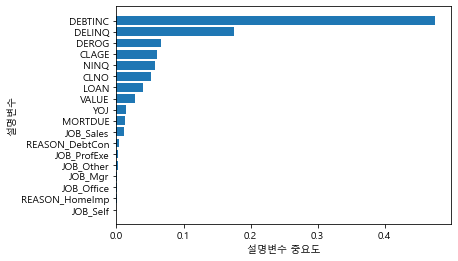

In [48]:
df_importance.sort_values("Importance", ascending=True, inplace = True)
coordinates = range (len(df_importance))
plt.barh(y=coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("설명변수 중요도")
plt.ylabel("설명변수")